# Preparing the enviroment and mounting data

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
#from google.colab import drive
#drive.mount("/content/drive/")
#cd drive/My Drive/SFU/Project4-Spring2021
!ls

clinical_01Mar2021.xlsx        sample_data		 x_clinical_names.npy
data_preprossing_functions.py  samples.npy		 x_clinical.npy
eval.py			       snpsback_cadd.npy	 x_colnames.npy
known_snps_fullname.txt        snpsback_gt_dominant.npz  x_snps.npy
known_snps.txt		       snpsback_variants.npy	 y.npy
__pycache__		       train.py


In [2]:
# reading snps file
#libraries
import pandas as pd
import numpy as np 
from scipy import sparse

preprocessing = False


# BCCH Data Analysis 

## Data 
There are two options: 
1. Pre-processing: require original files on the server and perform the pre-processing / filtering 
2. Load files saved on local machine 


In [3]:
path = '/content/'
if preprocessing:  
  print('Option 1: Starting pre-processing:')
  import data_preprossing_functions as dpf
  y, x_clinical, x_snps, x_colnames, x_clinical_names = dpf.run_preprocessing(path, True)
  print('Done!')
  print('Shapes:',len(y), x_clinical.shape, x_snps.shape, len(x_colnames), len(x_clinical_names))
  #318 (318, 42) (318, 16641) 16641
else: 
  print('Option 2: Reading files')
  y =  np.load('y.npy')
  x_clinical = np.load('x_clinical.npy',allow_pickle =True)
  x_clinical_names = np.load('x_clinical_names.npy',allow_pickle =True)
  x_snps = np.load('x_snps.npy',allow_pickle =True)
  x_colnames  = np.load('x_colnames.npy',allow_pickle =True)
  print('Done!')
  print('Shapes:',len(y), x_clinical.shape, x_snps.shape, len(x_colnames), len(x_clinical_names))
 

Option 2: Reading files
Done!
Shapes: 302 (302, 41) (302, 16195) 16195 41


## ParKCa

1. Learners: Deconfounder, BART, CEVAE

BART OR CEVAE CODE? 



Instructions for updating:
non-resource variables are not supported in the long term
DA
Pass Predictive Check: dappcalr_15_DA ( 0.5397570389145905 )
Im here


ValueError: ignored

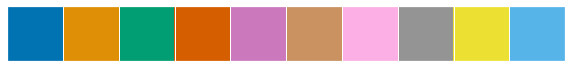

In [4]:
import train as parkca
level1data = parkca.learners_bcch(path_output = '', DA = True, BART = False, X = x_snps, y = y, 
                                  colnamesX = x_colnames,causes = 'snps', Z = x_clinical, colnamesZ = x_clinical_names)




In [ ]:
x_clinical